#  Matrices y aplicaciones lineales

#### https://meet.noysi.com/metodosnumericos1

Para definir un vector o una matriz con Sage, debemos usar las funciones `vector` y `matrix`, respectivamente. La primera entrada (opcional) es un valor con el tipo de dato que queremos usar, como `ZZ` para enteros, `RDF` para reales en doble precisión y `CDF` para complejos en doble precisión. La segunda entrada (o primera si no hemos elegido tipo de datos) es una lista en el caso del vector y una lista con una lista por cada fila de la matrix. Veamos algunos ejemplos.

In [2]:
v = vector(ZZ,[1,2,3])
type(v) 
v

(1, 2, 3)

In [4]:
w = vector(RDF,[1,2,3])
v,w

((1, 2, 3), (1.0, 2.0, 3.0))

In [5]:
# Podemos sumarlos. Para ello convertirá los enteros en números reales.
v + w

(2.0, 4.0, 6.0)

In [6]:
type(v+w)

<class 'sage.modules.vector_real_double_dense.Vector_real_double_dense'>

In [7]:
# Si no ponemos tipo, elige el menos general posible
u = vector([1,2,3])
type(u)

<class 'sage.modules.vector_integer_dense.Vector_integer_dense'>

In [9]:
vector([x,x^2,x^3])
type(vector([x,x^2,x^3]))

<class 'sage.modules.free_module.FreeModule_ambient_field_with_category.element_class'>

Veamos algunos ejemplos con matrices.

In [12]:
# Una matriz de números reales (con saltos de línea visualizarlo mejor)
A = matrix(RDF, [[1,2,-3],
                 [3,1,1],
                 [1,1,2]])
show(A)

[ 1.0  2.0 -3.0]
[ 3.0  1.0  1.0]
[ 1.0  1.0  2.0]

In [13]:
# Otra de enteros (en este caso no hemos incluído saltos de línea)
B = matrix([[1,0,-1],[0,1,2],[1,1,1]])
show(B)

[ 1  0 -1]
[ 0  1  2]
[ 1  1  1]

In [14]:
# Podemos operar con matrices y vectores
show(A+B,A*B,A*u,7*v,-2*A,B^10)

[ 2.0  2.0 -4.0]
[ 3.0  2.0  3.0]
[ 2.0  2.0  3.0] [-2.0 -1.0  0.0]
[ 4.0  2.0  0.0]
[ 3.0  3.0  3.0] (-4.0, 8.0, 9.0) (7, 14, 21) [-2.0 -4.0  6.0]
[-6.0 -2.0 -2.0]
[-2.0 -2.0 -4.0] [-510 -511 -512]
[1022 1023 1024]
[ 512  512  512]

También están definidas las funciones usuales sobre matrices. Se puede consultar https://doc.sagemath.org/html/es/tutorial/tour_linalg.html para una introducción. Veamos cómo calcular el determinante y los autovalores y autovectores.


In [15]:
# Determinante
A.det()

-15.0

In [16]:
# Autovalores y autovectores
A.eigenvectors_right()

[(-1.5556218095982448,
  [(-0.6412412320435307, 0.7665298768041033, -0.03523677473862972)],
  1),
 (2.7778109047991224 + 1.3878807693997999*I,
  [(-0.21853271682511885 - 0.4144302768311717*I, -0.6460200641125966, -0.4929033642230452 + 0.34669200686521673*I)],
  1),
 (2.7778109047991224 - 1.3878807693997999*I,
  [(-0.21853271682511885 + 0.4144302768311717*I, -0.6460200641125966, -0.4929033642230452 - 0.34669200686521673*I)],
  1)]

La orden anterior muestra una lista que contiene un elemento por cada autovalor. El elemento (tupla) contiene el autovalor en la primera posición, una base en la segunda posición (lista de vectores) y la multiplicidad de ese autovalor. Vamos a quedarnos con esos valores:

In [17]:
autovalores = [l for l,v,m in A.eigenvectors_right()]
autovalores

[-1.5556218095982448,
 2.7778109047991224 + 1.3878807693997999*I,
 2.7778109047991224 - 1.3878807693997999*I]

In [18]:
# Esto es válido si no hay autovalores duplicados
autovectores = [v[0] for l,v,m in A.eigenvectors_right()]
autovectores

[(-0.6412412320435307, 0.7665298768041033, -0.03523677473862972),
 (-0.21853271682511885 - 0.4144302768311717*I, -0.6460200641125966, -0.4929033642230452 + 0.34669200686521673*I),
 (-0.21853271682511885 + 0.4144302768311717*I, -0.6460200641125966, -0.4929033642230452 - 0.34669200686521673*I)]

Vamos a representar los autovalores como vectores en el plano complejo.

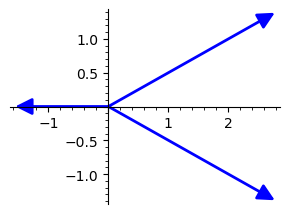

In [20]:
sum( [ arrow( (0,0) , (k.real(),k.imag()) ) for k in autovalores ] ) .show(figsize=3)

<div class="alert alert-block alert-info">
<strong>Ejercicio 1. </strong> Consideremos la matriz
    $$A=\left(\begin{array}{rrr}
3 & 1  \\
2 & -2  
\end{array}\right)$$

a) Calcula el determinante, los autovalores y los autovectores de la matriz.

b) Representa los autovectores. Comprueba que son autovectores.

c) Para cada vector de la base usual, dibuja una flecha cuyo origen sea dicho vector y el destino sea su imagen por $A$.
</div>

In [21]:
A = matrix(RDF,[[3,1],[2,-2]])
show(A)

[ 3.0  1.0]
[ 2.0 -2.0]

In [22]:
A.det()

-8.0

In [28]:
l1,l2 = A.eigenvalues()
l1,l2

(3.3722813232690143, -2.3722813232690143)

In [46]:
A.eigenvectors_right()

[(3.3722813232690143, [(0.9371641612794526, 0.3488887140814106)], 1),
 (-2.3722813232690143, [(-0.18299737893132018, 0.983113401039914)], 1)]

In [47]:
(0.9371641612794526, 0.3488887140814106)

(0.937164161279453, 0.348888714081411)

In [40]:
eig = A.eigenvectors_right()
eig[0][1][0]

(0.9371641612794526, 0.3488887140814106)

In [29]:
v1,v2 = [v[0] for l,v,m in A.eigenvectors_right()]
v1,v2

((0.9371641612794526, 0.3488887140814106),
 (-0.18299737893132018, 0.983113401039914))

In [41]:
A*v1 - l1*v1

(0.0, 0.0)

In [43]:
A*v2 - l2*v2

(-5.551115123125783e-17, 0.0)

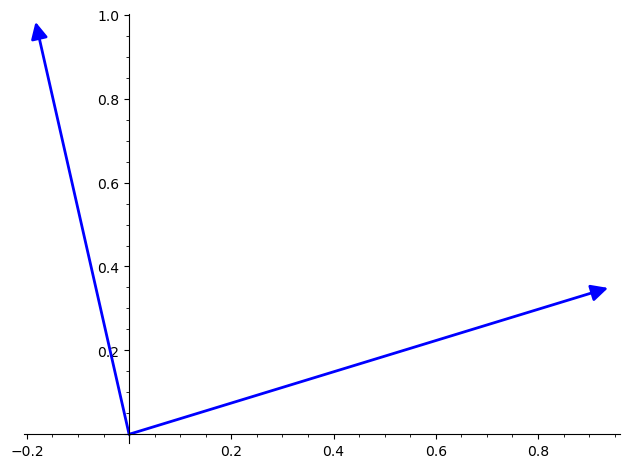

In [45]:
arrow( (0,0), v1) + arrow( (0,0), v2)

In [82]:
e1,e2 = matrix.identity(2)
e1,e2

((1, 0), (0, 1))

# Normas matriciales 

Podemos calcular la norma matricial usando la función norm de Sage. Si no se especifica nada, será la norma euclídea.

In [54]:
A = matrix([[1,2,3],[4,5,-6],[0,0,1]])
show(A)

[ 1  2  3]
[ 4  5 -6]
[ 0  0  1]

In [53]:
A.norm(),A.norm(2),A.norm(1),A.norm(oo)

(9.534201129544496, 9.534201129544496, 10.0, 15.0)

Podemos calcular el número de condición de una matriz usando el método condition. Con la norma 2:

In [67]:
A = random_matrix(RDF, 3)
show(A)

[ 0.31803948759292133   0.6362731189316753  0.06351987574929852]
[ -0.9217283411522823   0.3257302199434402   0.5699408395860324]
[  0.9048201217416583 -0.19433347803322953   0.4098664773843099]

In [68]:
A.condition(2),A.det()

(2.236711998375239, 0.6388395430405767)

Las matrices de Hilbert están especialmente mal condicionadas

In [72]:
n = 4
A = matrix(RDF,  [ [1/(i+j+1) for i in range(n)] for j in range(n)])
show(A)

[                1.0                 0.5  0.3333333333333333                0.25]
[                0.5  0.3333333333333333                0.25                 0.2]
[ 0.3333333333333333                0.25                 0.2 0.16666666666666666]
[               0.25                 0.2 0.16666666666666666 0.14285714285714285]

In [73]:
A.condition(2)

15513.738738929662

Podemos comparar el número de condición obtenido con el obtenido a partir de la definición.

In [75]:
A.norm(2)*(A.inverse()).norm(2)

15513.738738931197

Si la matriz no es de doble precisión, no calcula el número de condición.

In [76]:
A = random_matrix(QQ, 3)
show(A)

[  0  -2   0]
[ -2 1/2   0]
[  2  -2   1]

In [77]:
A.condition(2)

AttributeError: 'sage.matrix.matrix_rational_dense.Matrix_rational_dense' object has no attribute 'condition'

In [78]:
# Aunque sí podemos calcularlo con la definición
A.norm(2)*A.inverse().norm(2)

6.0772466998345065

<div class="alert alert-block alert-info">
    <strong>Ejercicio 1. </strong>
    
a) Calcula las normas 1,2 e infinito de la matriz
$$A=\left(\begin{array}{rrrr} 
4       & -1    & 0      & 1 \\
-1      & 4     & 0      & 0 \\
1       & 0     & 5      & -1 \\
-1      & 1     & 1      & 4 \\
\end{array}
\right)
.$$

b) Calcula un vector unitario con la norma 1, $u$, tal que $\|Au\|_1=\|A\|_1\|u\|_1$.

c) Idem para las normas $2$ e $\infty$.

d) Calcular los autovectores unitarios (usar la orden de sage eigenvectors_right) con la norma euclídea de $A^tA$. Calcular su imagen por $A$. Comprobar que tanto los autovectores como sus imágenes son ortogonales, es decir, forman una base. Calcular $\min_{\|u\|_2=1} \|Au\|_2$. Repetir el proceso cambiando $A$ por $A^{-1}$. ¿Qué relación hay entre la $1/\|A^{-1}\|_2$ y  $\min_{\|u\|_2=1} \|Au\|_2$?

e) Calcular $\min_{\|u\|_1=1} \|A u\|_1$. 

f) Idem para la norma infinito.
</div>

In [9]:
A = matrix([[4,-1,0,1],[-1,4,0,0],[1,0,5,-1],[-1,1,1,4]])
show(A)

[ 4 -1  0  1]
[-1  4  0  0]
[ 1  0  5 -1]
[-1  1  1  4]

In [10]:
A.norm(1),A.norm(2),A.norm(oo)

(7.0, 5.469890020958683, 7.0)

In [11]:
v = vector([1,0,0,0])
(A*v).norm(1)

7

In [12]:
v = vector([1,1,1,-1])
(A*v).norm(oo)

7

In [17]:
B = A.transpose()*A
v1,v2,v3,v4 = [b[0] for l,b,m in  B.eigenvectors_right()]
v1,v2,v3,v4

((1, 1.061313614664067?, -0.3040629487652186?, -0.2617200798609389?),
 (1, -0.2110760161194742?, -0.08523753713346103?, 3.063959508478343?),
 (1, -1.905561804862378?, -2.899118553128951?, -0.5383008864844724?),
 (1, -0.767332043682216?, 0.9149815390276303?, -0.3537822921329313?))

In [21]:
u1 = v1/v1.norm(2)
u2 = v2/v2.norm(2)
u3 = v3/v3.norm(2)
u4 = v4/v4.norm(2)
u1,u2,u3,u4

((0.6612029800113330?, 0.7017437247424805?, -0.2010473278345958?, -0.1730500967328569?),
 (0.3094971752943993?, -0.06532743076137235?, -0.02638077697185766?, 0.9482868130904632?),
 (0.2739384510137521?, -0.522006649134970?, -0.7941800457493748?, -0.1474613110228860?),
 (0.6260829360117611?, -0.4804134988044663?, 0.572854328350979?, -0.2214970561675562?))

In [22]:
(A*u1).norm(2),(A*u2).norm(2),(A*u3).norm(2),(A*u4).norm(2)

(2.914385999284149?,
 4.182675517902756?,
 5.009179864781266?,
 5.469890020958684?)

<div class="alert alert-block alert-info">
    <strong>Ejercicio 2. </strong>
    
a) Busca cómo definir en Sage las matrices de Hilbert. Calcula los números de condición de la matriz de Hilbert de dimensión 5 con la norma 1 y con la norma infinito. Calcula también su número de condición con ambas normas. ¿Qué piensas que ocurrirá al resolver un sistema definido por dicha matriz? 
    
b) Crea varias matrices aleatorias de dimensión 4. Calcula su determinante y su número de condición (con tu norma preferida). ¿Qué relación piensas que puede haber?
    
c) Crea muchas matrices aleatorias de dimensión 4 y representa en una gráfica el determinante y el número de condición.
</div>

<div class="alert alert-block alert-info">
    <strong>Ejercicio 3. </strong>    Consideramos el sistema

$$\left(\begin{array}{rr} 1 & 1/30 \\ 1 & 1/31 \end{array}\right)x=b,$$

con $b$ un vector unitario con la norma 2. Suponemos que tenemos un pequeño error en el término independiente, es decir, en lugar de $b$, tenemos $b+\tilde b$ y sabemos que $\|\tilde b\|_2/\|b\|_2 = 1\%$. 

   a) Calcular el número de condición de la matriz del sistema con la norma euclídea.
    
   b) Acotar el error relativo de las soluciones.
    
   c) Encontrar $b$ y $\tilde b$ en las condiciones anteriores para que el error sea máximo.  
    
   d) Idem para mínimo.
    
   e) Repite el ejercicio cambiando la norma 2 por la norma 1.
    
</div>

In [62]:
A = matrix([[1,1/30],[1,1/31]])
show(A,A.norm(2))

[   1 1/30]
[   1 1/31] 1.4149738924648174

Buscamos $x$ tal que $\|A x\|_2 =\|A\|_2\|x\|_2$. $b$ será $Ax$.

In [63]:
B = A.transpose()*A
B.eigenvectors_right()
v1 = vector([1, -30.49179447447914])
v2 = vector([1, 0.03279570839417060])

In [64]:
# El vector que queremos es v2
(A*v1).norm(2)/v1.norm(2),(A*v2).norm(2)/v2.norm(2)

(0.000759921312280353, 1.41497389246482)

In [65]:
b = A*v2
show(b)

(1.00109319027981, 1.00105792607723)

Buscamos $\tilde b$ tal que $\|A^{1} \tilde b\|_2 =\|A^{-1}\|_2\|\tilde b\|_2$

In [66]:
Binversa = A.inverse().transpose()*A.inverse()
Binversa.eigenvectors_right()
u1 = vector([1, 0.999964774305813])
u2 = vector([1, -1.000035226935081])

In [67]:
# El vector que queremos es u2
(A.inverse()*u1).norm(2)/u1.norm(2),(A.inverse()*u2).norm(2)/u2.norm(2)

(0.706726820420727, 1315.92571999228)

In [68]:
btilde = u2

Comprobamos:

In [69]:
# x
A\b

(1.00000000000000, 0.0327957083941743)

In [70]:
# x tilde
A\btilde

(-61.0010920349875, 1860.03276104962)

In [71]:
# El error relativo es la norma de x tilde entre la de x
(A\btilde).norm(2)/(A\b).norm(2)

1860.03276104962

<div class="alert alert-block alert-info">
    <strong>Ejercicio 4. </strong>    Consideramos la matriz

$$A=\left(\begin{array}{rr} 2 & 3 \\ 4 & 5 \end{array}\right)$$

   a) Representa la imagen por $A$ de la bola unidad.
    
   b) Calcula los ejes de la elipse que has obtenido en el punto anterior y añádelos al gráfico anterior.
    
   c) Calcula la norma 2 de $A$. Añade al gráfico la circunferencia de centro el origen y radio $\|A\|_2$.
    
   d) Idem para la norma 2 de $A^{-1}$.
    
    
</div>

In [73]:
b(t) = [cos(t),sin(t)]

In [76]:
A = matrix([[2,3],[4,5]])
A*vector(b(t))

(2*cos(t) + 3*sin(t), 4*cos(t) + 5*sin(t))

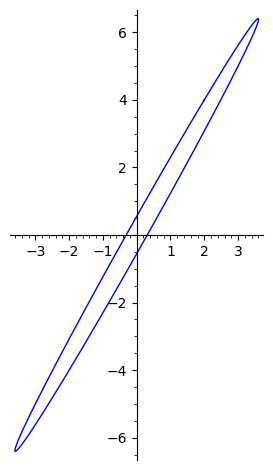

In [77]:
parametric_plot(A*vector(b(t)),(t,0,2*pi))